**Importing the libraries**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# Here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv("diabetes.csv")

In [ ]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
659,3,80,82,31,70,34.2,1.292,27,1
750,4,136,70,0,0,31.2,1.182,22,1
559,11,85,74,0,0,30.1,0.300,35,0
418,1,83,68,0,0,18.2,0.624,27,0
432,1,80,74,11,60,30.0,0.527,22,0
14,5,166,72,19,175,25.8,0.587,51,1
695,7,142,90,24,480,30.4,0.128,43,1
343,5,122,86,0,0,34.7,0.290,33,0
755,1,128,88,39,110,36.5,1.057,37,1
295,6,151,62,31,120,35.5,0.692,28,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Data Cleaning**

In [ ]:
data1 = data.drop_duplicates()
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in data.describe

In [ ]:
print(data[data['BloodPressure']==0].shape[0])
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

35
5
227
374
11


Replacing 0 values with median of that column

In [ ]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())#normal distribution
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())#normal distribution
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())#skewed distribution
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())#skewed distribution
data['BMI']=data['BMI'].replace(0,data['BMI'].median())#skewed distribution

**Data Visualization**

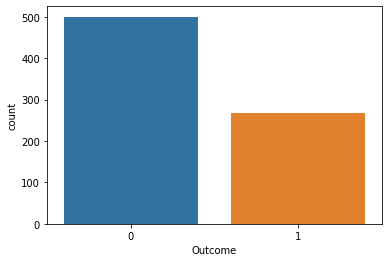

In [ ]:
sns.countplot('Outcome',data=data)

Text(0.5, 1.0, 'Glucose')

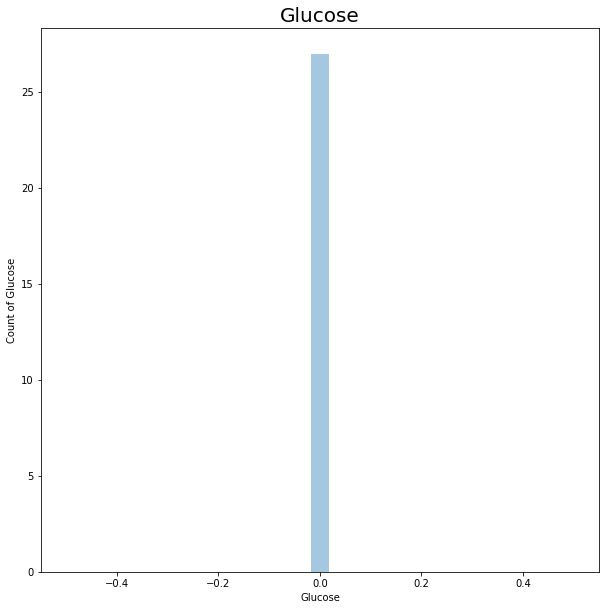

In [ ]:
fig = plt.figure(figsize = (10,10))

sns.distplot(data['Glucose'][data['Outcome']] == 1)
plt.xticks()
plt.ylabel("Count of Glucose")
plt.title("Glucose", fontsize = 20)

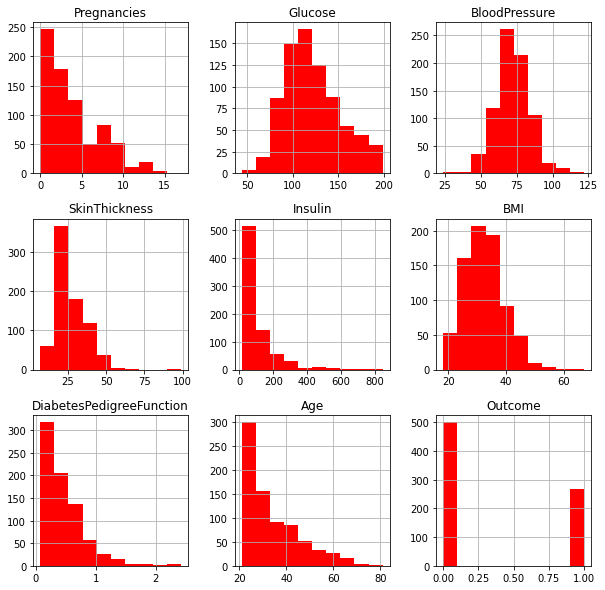

In [ ]:
#histogram for each  feature
data.hist(bins=10,figsize=(10,10), color = "red")
plt.show()

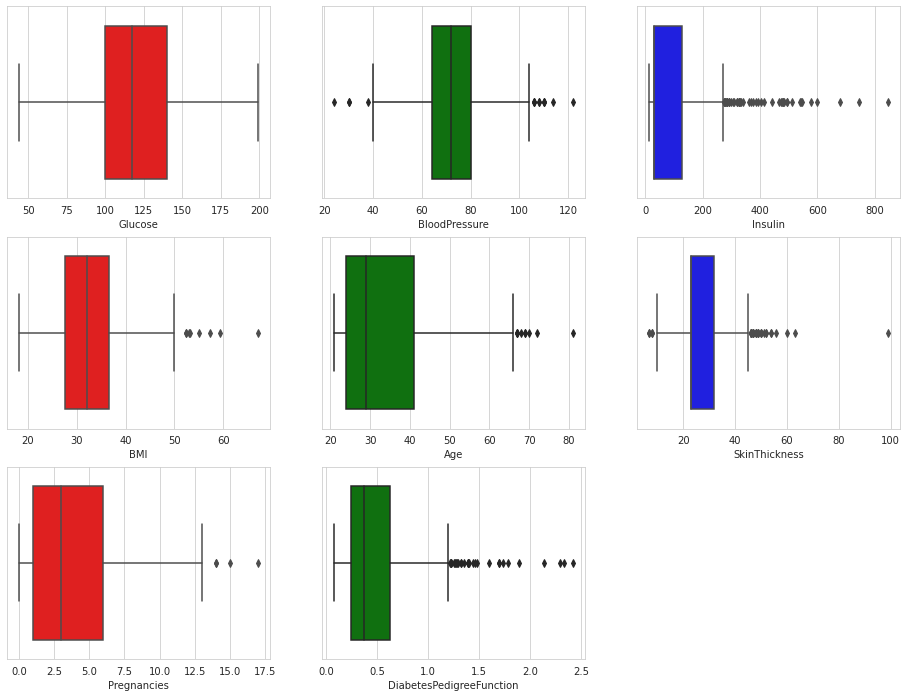

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=data, color = "Red")
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=data, color = "Green")
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=data, color = "Blue")
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=data, color = "Red")
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=data, color = "Green")
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=data, color = "Blue")
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=data, color = "Red")
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=data, color = "Green")

**Scatter Matrix**

It is a grid of scatter plots

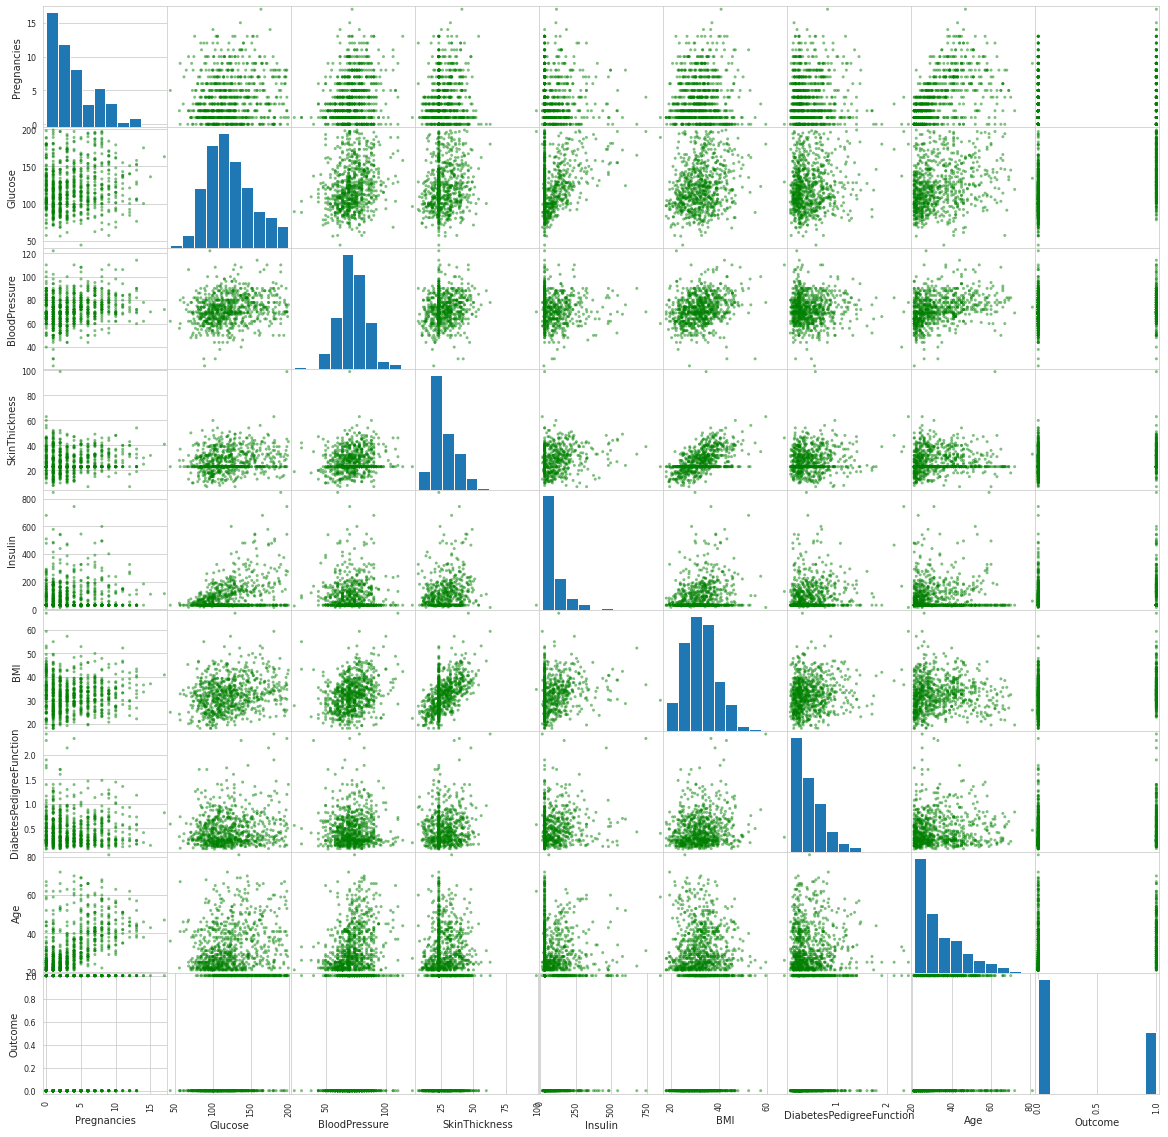

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(20,20), color = "Green");
# we can come to various conclusion looking at these plots.
#example  if you observe 5th plot in pregnancies with insulin, you can conclude that women with higher number of pregnancies have lower insulin

**Correlation**

Using Heatmaps

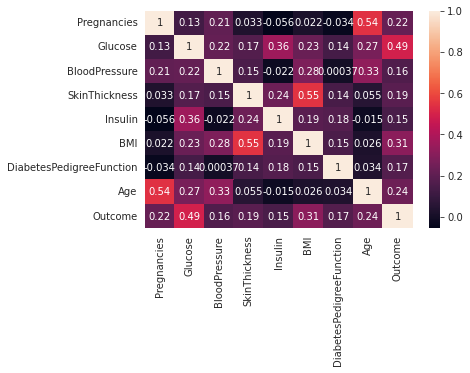

In [ ]:
corrmat=data.corr()
sns.heatmap(corrmat, annot=True)

In [ ]:
data_selected=data.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

**Handling Outliers**

Handling observations that lie at an abnormal distance in the data

In [ ]:
from sklearn.preprocessing import QuantileTransformer
x=data_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
data_new=quantile.transform(X)
data_new=pd.DataFrame(X)
data_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
data_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


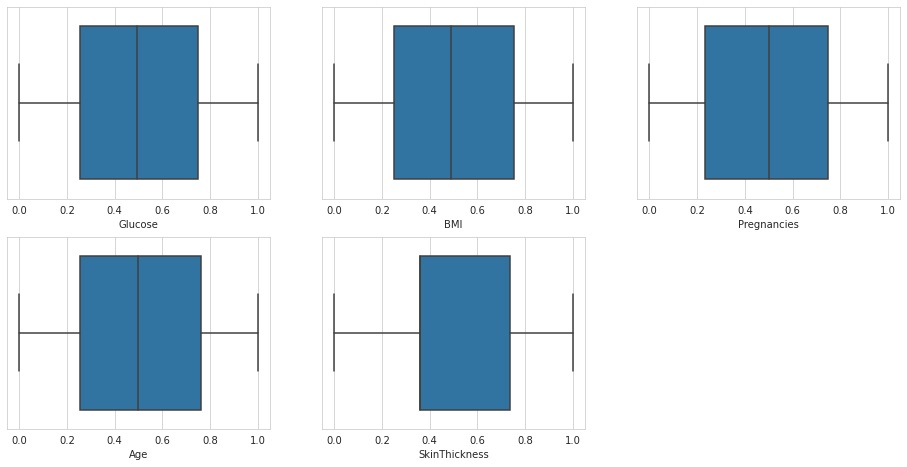

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=data_new['Glucose'],data=data_new)
plt.subplot(3,3,2)
sns.boxplot(x=data_new['BMI'],data=data_new)
plt.subplot(3,3,3)
sns.boxplot(x=data_new['Pregnancies'],data=data_new)
plt.subplot(3,3,4)
sns.boxplot(x=data_new['Age'],data=data_new)
plt.subplot(3,3,5)
sns.boxplot(x=data_new['SkinThickness'],data=data_new)

In [ ]:
target_name='Outcome'
y= data[target_name]#given predictions - training data 
X=data.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [ ]:
x.head() # contains only independent features 

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6,148.0,35,33.6,50,1
1,1,85.0,29,26.6,31,0
2,8,183.0,23,23.3,32,1
3,1,89.0,23,28.1,21,0
4,0,137.0,35,43.1,33,1


In [ ]:
y.head() #contains dependent feature

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

In [ ]:
X_train.shape, y_train.shape

((614, 8), (614,))

In [ ]:
X_test.shape, y_test.shape

((154, 8), (154,))

**K Nearest Neighbour Algorithm**

The abbreviation KNN stands for “K-Nearest Neighbour”. It is a supervised machine learning algorithm. The algorithm can be used to solve both classification and regression problem statements.

The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol ‘K’.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [ ]:
best_model = grid_search.fit(X_train,y_train)

In [ ]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 15


In [ ]:
#Predict testing set
knn_pred = best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       107
           1       0.65      0.64      0.65        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.78      0.79      0.79       154


 F1:
 0.6451612903225806

 Precision score is:
 0.6521739130434783

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



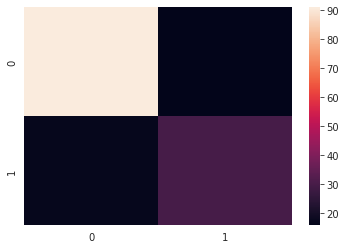

In [ ]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

**Naive Bayes**

Naive Bayes is classification approach that adopts the principle of class conditional independence from the Bayes Theorem. This means that the presence of one feature does not impact the presence of another in the probability of a given outcome, and each predictor has an equal effect on that result

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [ ]:
best_model= nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
nb_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       107
           1       0.66      0.45      0.53        47

    accuracy                           0.76       154
   macro avg       0.72      0.67      0.69       154
weighted avg       0.75      0.76      0.74       154


 F1:
 0.5316455696202532

 Precision score is:
 0.65625

 Recall score is:
 0.44680851063829785

 Confusion Matrix:



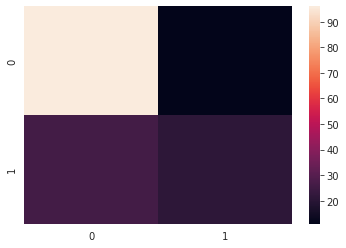

In [ ]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

**Support Vector Machines**

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. 

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [ ]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [ ]:
grid_result = grid_search.fit(X, y)

In [ ]:
svm_pred=grid_result.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       107
           1       0.73      0.57      0.64        47

    accuracy                           0.81       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.80      0.81      0.80       154


 F1:
 0.6451612903225806

 Precision score is:
 0.6521739130434783

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



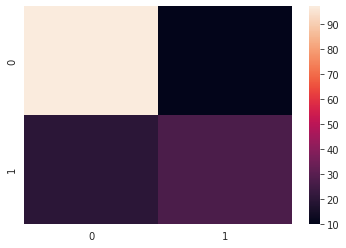

In [ ]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

**Elastic Net**

Elastic Net is an extension of linear regression that adds regularization penalties to the loss function during training.

The benefit is that elastic net allows a balance of both penalties, which can result in better performance than a model with either one or the other penalty on some problems.



In [ ]:
enet1 = ElasticNet()

# Fit the model
model_enet1 = enet1.fit(X_train, y_train)

# Prediction
y_pred_train_enet1 = enet1.predict(X_train)
y_pred_test_enet1 = enet1.predict(X_test)

# Accuracy Score
print('Training accuracy : {}\n'.format(r2_score(y_train, y_pred_train_enet1).round(5)))
print('Testing accuracy : {}'.format(r2_score(y_test, y_pred_test_enet1).round(5)))

Training accuracy : 0.26372

Testing accuracy : 0.27003


In [ ]:
mse5 = cross_val_score(enet1, X, y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse5 = np.mean(mse5)
print(-(mean_mse5).round(5))

0.1689


In [ ]:
enet2 = ElasticNet()

parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 0.9, 0.8, 0.7, 0.5, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

enet_regressor = GridSearchCV(enet2, parameters, scoring='neg_mean_squared_error', cv= 10)

enet_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.9, 0.8,
                                   0.7, 0.5, 1, 5, 10, 20, 30, 35, 40, 45, 50,
                                   55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(enet_regressor.best_params_)
print(-(enet_regressor.best_score_))

{'alpha': 0.001}
0.16287231316500342


In [ ]:
mse5 = cross_val_score(enet_regressor, X, y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse5 = np.mean(mse5)
print(-(mean_mse5))

0.15766391258481494


Accuracy Calculation

Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. 

Formally, accuracy has the following definition:

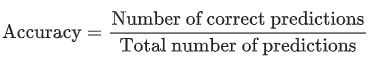

In [ ]:
# Prediction
y_train_pred_enet2 = enet_regressor.predict(X_train)
y_test_pred_enet2 = enet_regressor.predict(X_test)

# Accuracy Score
print('Training accuracy : {}\n'.format(r2_score(y_train, y_train_pred_enet2).round(5)))
print('Testing accuracy : {}'.format(r2_score(y_test, y_test_pred_enet2).round(5)))